In [85]:
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForCausalLM

from sdscm import plot_dag_from_sample_space, generate_data_from_config

# Load language model

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token
model = AutoModelForCausalLM.from_pretrained('gpt2')

# Sample from one of $10^{14}$ possible breast cancer SD-SCMs

Chosen sample space:
[{'prefix': 'A ', 'suffix': '-year-old woman is referred to the oncology clinic due to a recent diagnosis of invasive breast carcinoma.', 'candidate_set': ['25', '35', '45', '55', '65', '75', '85'], 'intervention_choice': None, 'parent_indices': None, 'exogenous': True, 'variable_name': 'age'}, {'prefix': 'Her medical history includes ', 'suffix': '.', 'candidate_set': ['hypertension', 'type 2 diabetes mellitus', 'hyperlipidemia', 'osteoporosis'], 'intervention_choice': None, 'parent_indices': [0], 'exogenous': True, 'variable_name': 'medical conditions'}, {'prefix': 'She is on ', 'suffix': ' to manage it.', 'candidate_set': ['lisinopril', 'metformin', 'atorvastatin', 'calcium carbonate'], 'intervention_choice': None, 'parent_indices': [0, 1], 'exogenous': True, 'variable_name': 'medication'}, {'prefix': 'This ', 'suffix': ' woman without a history of breast surgeries or hormone replacement therapy underwent a full evaluation, including imaging and biopsy. The biop

100%|██████████| 100/100 [01:01<00:00,  1.62it/s]


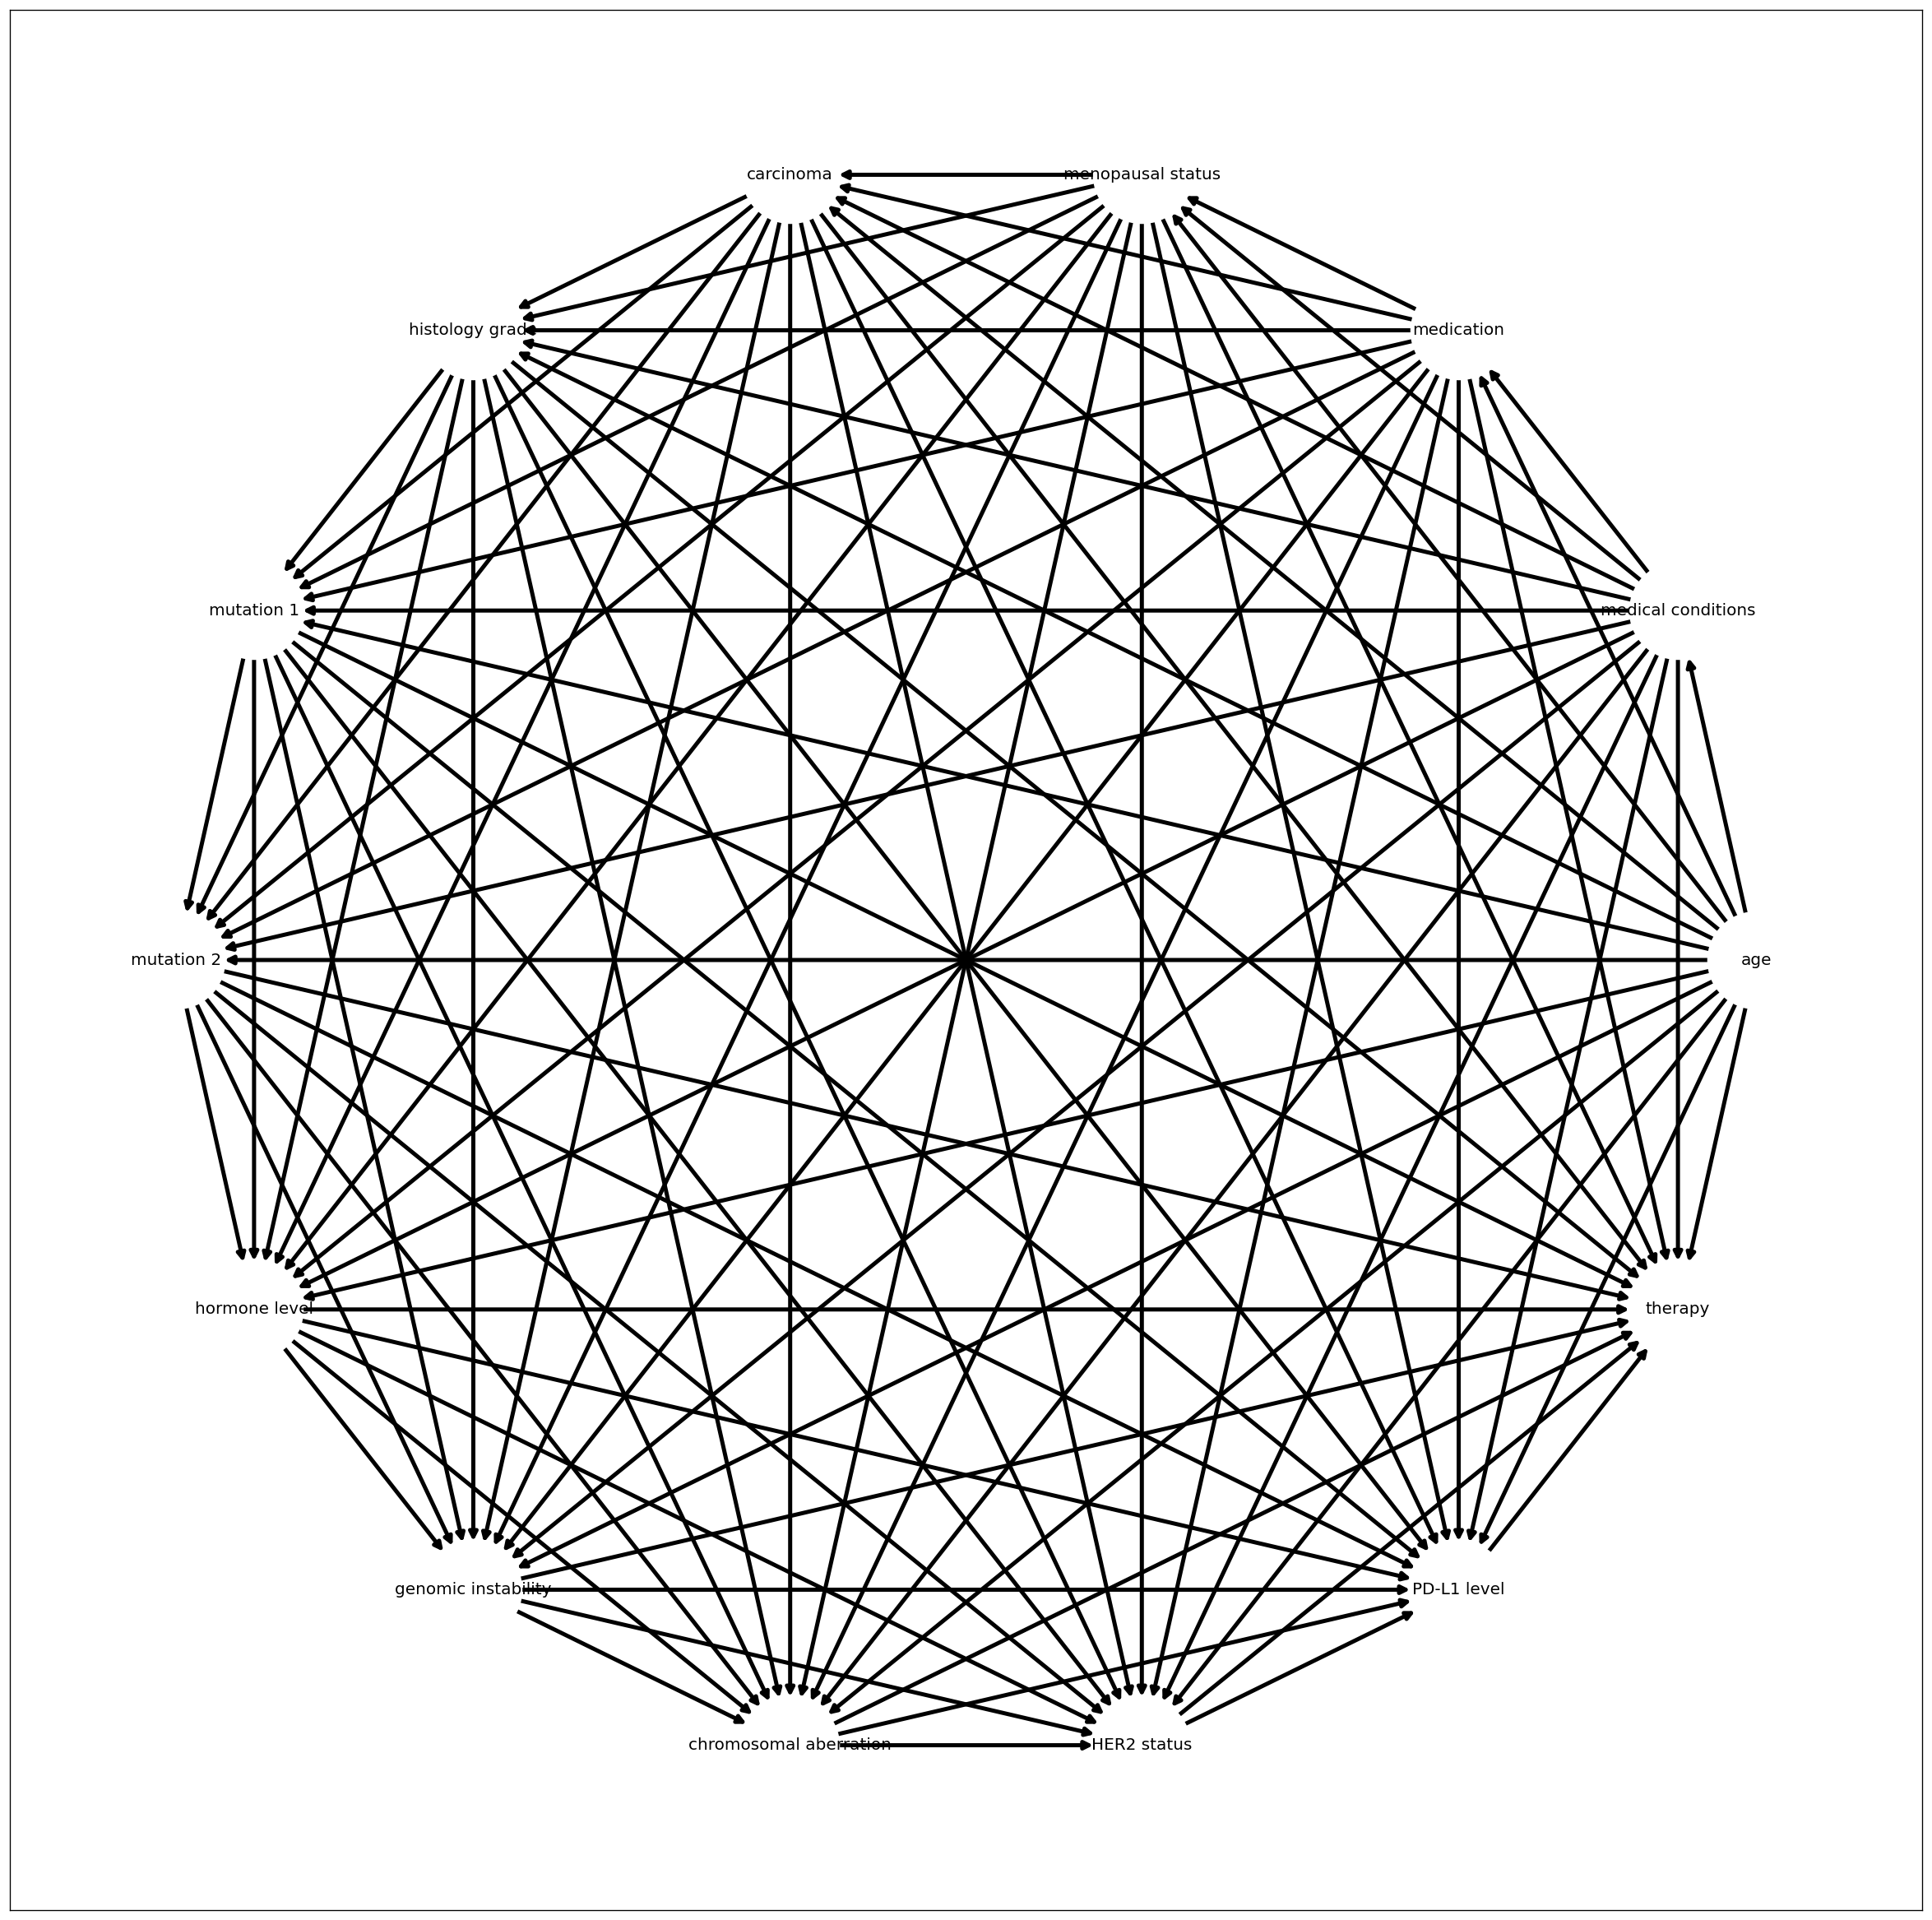

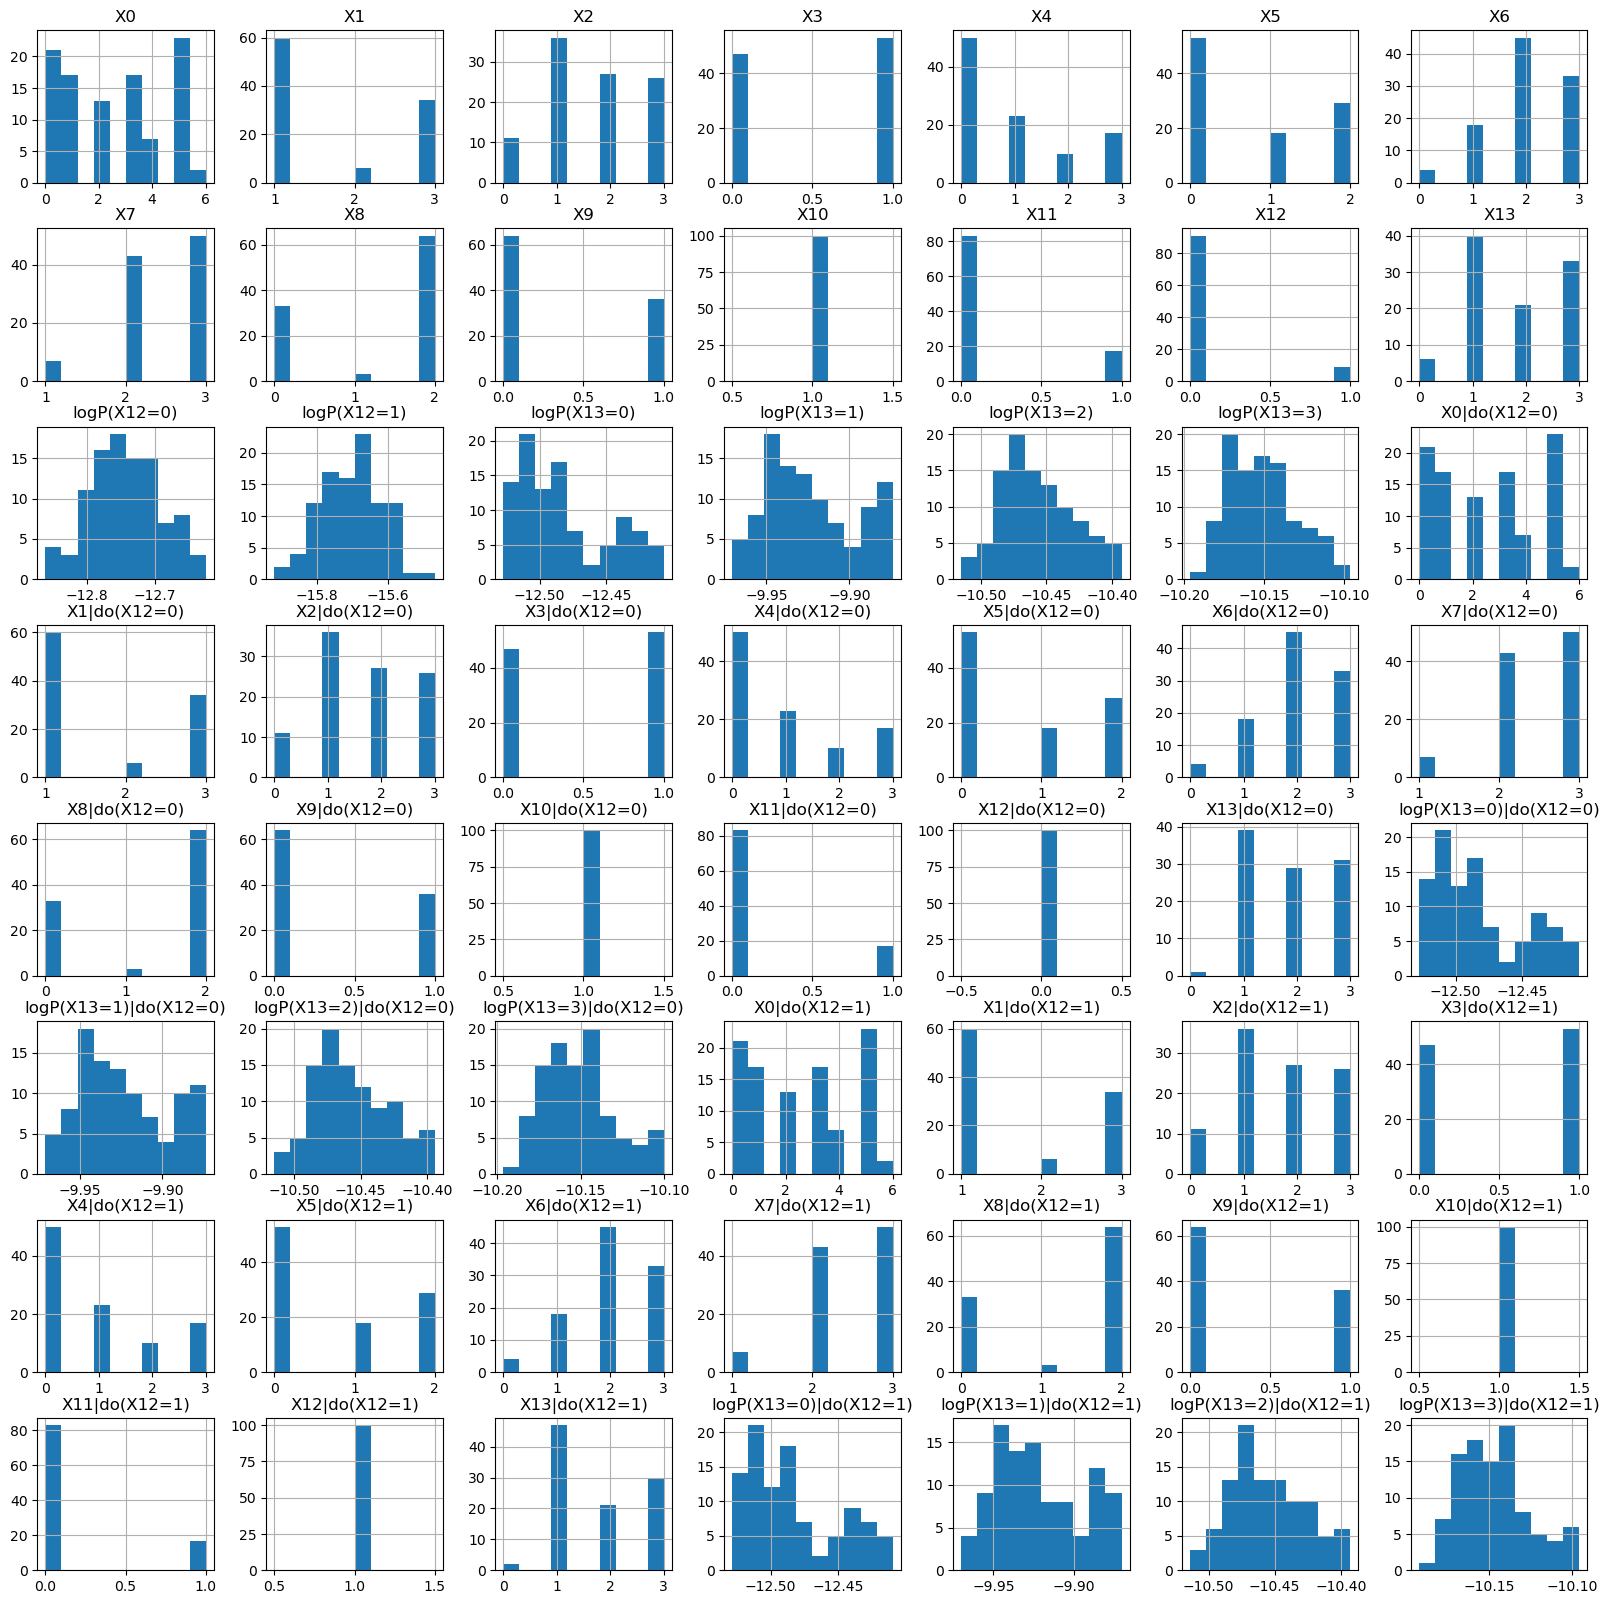

In [90]:
result_dict = generate_data_from_config(
    model=model,
    tokenizer=tokenizer,
    config_path='configs/breast_cancer_config.json',
    config_random_state=0,
    sample_random_state=0,
    num_samples=100
)

sample_space = result_dict['sequence_sample_space']
plt.figure(figsize=(25, 25), dpi=120)
plot_dag_from_sample_space(sample_space)

data_df = result_dict['data_df']
data_df.hist(figsize=(20, 20))
plt.show()